In [6]:
import pandas as pd #importing pandas for data processing
import matplotlib.pyplot as plt#importing matplot for visualizations
import altair as alt #importing altair
import seaborn as sns #importing seaborn
import math # for calculation
import numpy as np #for linear algebra
import scipy.stats as stats

In [7]:
df = pd.read_csv(r'C:\Users\dines\onedrive\Desktop\covid1.csv') #reading the dataset that is in csv format using pandas.

In [8]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166321,ZWE,Africa,Zimbabwe,2022-03-01,236871.0,491.0,413.000,5395.0,0.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166322,ZWE,Africa,Zimbabwe,2022-03-02,237503.0,632.0,416.286,5396.0,1.0,1.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166323,ZWE,Africa,Zimbabwe,2022-03-03,237503.0,0.0,362.286,5396.0,0.0,0.857,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
166324,ZWE,Africa,Zimbabwe,2022-03-04,238739.0,1236.0,467.429,5397.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [9]:
df.head() #for showing information in the dataframe

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [10]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.632930e+05,1.631330e+05,1.611500e+05,1.454510e+05,145487.000000,143390.000000,162535.000000,162375.000000,160398.000000,144706.000000,...,106050.000000,104595.000000,68569.000000,123664.000000,155268.000000,136253.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.536044e+06,1.157084e+04,1.156560e+04,5.766407e+04,171.137304,172.673031,29447.756785,166.431538,165.507110,509.384956,...,10.627229,32.778221,50.788710,3.027816,73.576309,0.725587,3.761302e+04,9.404336,15.967077,972.197816
std,1.543441e+07,8.442598e+04,8.257830e+04,3.021145e+05,832.251328,817.024076,51852.379656,683.021740,532.174029,784.551311,...,10.558306,13.523688,31.811788,2.450110,7.491615,0.149964,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.001000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,623.579000,0.042000,1.630000,18.580250,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.611700e+04,7.900000e+01,1.071430e+02,7.830000e+02,2.000000,2.429000,4731.521000,11.439000,18.829000,127.737500,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,2.987020e+05,1.063000e+03,1.146000e+03,7.307000e+03,20.000000,21.286000,37724.466000,101.289500,120.859750,711.954750,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.451295e+08,4.206334e+06,3.444237e+06,5.995245e+06,18020.000000,14689.143000,706541.904000,51427.491000,16052.608000,6322.263000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


The above describe command is used to get important information on the attributes of the dataset like count, mean, min, max, std etc.


In [11]:
df_finalcount=df.loc[df['date']=='2022-02-17']

There are 67 different attributes in the dataset and 166326 rows. There are various records for each country
and the last recorded data in the dataset is 17th of February, 2022. So that date has been taken as cut off date to get 
a record of each country available. 


In [12]:
df_finalcount.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
724,AFG,Asia,Afghanistan,2022-02-17,171673.0,154.0,317.857,7524.0,11.0,6.714,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
1476,OWID_AFR,NaN,Africa,2022-02-17,11133987.0,14527.0,12649.429,245679.0,627.0,363.857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2216,ALB,Europe,Albania,2022-02-17,269301.0,361.0,325.857,3430.0,7.0,4.000,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
2956,DZA,Africa,Algeria,2022-02-17,263369.0,375.0,454.000,6772.0,10.0,11.714,...,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
3690,AND,Europe,Andorra,2022-02-17,37522.0,70.0,64.000,150.0,0.0,0.286,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN


In [13]:
df_finalcount.dropna(subset=['continent'],inplace=True) #null values that are in the continent attribute have been dropped. 

C:\anaconda\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [14]:
df_finalcount.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
724,AFG,Asia,Afghanistan,2022-02-17,171673.0,154.0,317.857,7524.0,11.0,6.714,...,NaN,NaN,37.746,0.50,64.83,0.511,NaN,NaN,NaN,NaN
2216,ALB,Europe,Albania,2022-02-17,269301.0,361.0,325.857,3430.0,7.0,4.000,...,7.1,51.2,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN
2956,DZA,Africa,Algeria,2022-02-17,263369.0,375.0,454.000,6772.0,10.0,11.714,...,0.7,30.4,83.741,1.90,76.88,0.748,NaN,NaN,NaN,NaN
3690,AND,Europe,Andorra,2022-02-17,37522.0,70.0,64.000,150.0,0.0,0.286,...,29.0,37.8,NaN,NaN,83.73,0.868,NaN,NaN,NaN,NaN
4406,AGO,Africa,Angola,2022-02-17,98585.0,17.0,15.857,1899.0,0.0,0.286,...,NaN,NaN,26.664,NaN,61.15,0.581,NaN,NaN,NaN,NaN


In [15]:
df_stat=df_finalcount[['location','total_cases','total_deaths','total_deaths_per_million','cardiovasc_death_rate','diabetes_prevalence','gdp_per_capita','hospital_beds_per_thousand','human_development_index']].copy()

df_stat dataframe has been created taking only useful and important attributes like locaiton, total cases, total deaths per million, cardiovascular death rate,human development index etc, as part of statistical tests that are to be performed. 

In [16]:
df_stat.head()

,location,total_cases,total_deaths,total_deaths_per_million,cardiovasc_death_rate,diabetes_prevalence,gdp_per_capita,hospital_beds_per_thousand,human_development_index
724,Afghanistan,171673.0,7524.0,188.877,597.029,9.59,1803.987,0.50,0.511
2216,Albania,269301.0,3430.0,1193.901,304.195,10.08,11803.431,2.89,0.795
2956,Algeria,263369.0,6772.0,151.782,278.364,6.73,13913.839,1.90,0.748
3690,Andorra,37522.0,150.0,1939.137,109.135,7.97,NaN,NaN,0.868
4406,Angola,98585.0,1899.0,55.962,276.045,3.94,5819.495,NaN,0.581


In [17]:
df_stat.dropna(subset=['cardiovasc_death_rate','diabetes_prevalence','gdp_per_capita','hospital_beds_per_thousand','total_deaths_per_million','human_development_index'],inplace=True)

In [18]:
df_stat.shape #the shape of the dataframe in rows and columns 

(159, 9)

In [19]:
df_stat.describe()

,total_cases,total_deaths,total_deaths_per_million,cardiovasc_death_rate,diabetes_prevalence,gdp_per_capita,hospital_beds_per_thousand,human_development_index
count,1.590000e+02,159.000000,159.000000,159.00000,159.000000,159.000000,159.000000,159.000000
mean,2.617608e+06,36617.572327,1184.648195,257.31722,8.046415,19775.640157,2.940132,0.739038
std,7.903401e+06,107501.013818,1233.250430,120.09498,4.029152,19863.316059,2.338385,0.145133
min,2.757000e+03,5.000000,3.101000,79.37000,0.990000,661.240000,0.100000,0.394000
25%,6.319350e+04,799.000000,169.584000,164.00150,5.425000,5456.520500,1.300000,0.633000
50%,4.815120e+05,5381.000000,819.656000,240.20800,7.110000,13593.877000,2.300000,0.759000
75%,1.934836e+06,20982.500000,1924.617000,329.78850,10.080000,27827.371500,3.850500,0.851000
max,7.828055e+07,933121.000000,6264.019000,724.41700,22.660000,116935.600000,13.050000,0.957000


In [20]:
def cardiovascular_categ(row):  
    if row['cardiovasc_death_rate'] > 0 and row['cardiovasc_death_rate'] <= 150:
        return 'Low'
    elif row['cardiovasc_death_rate'] > 150 and row['cardiovasc_death_rate'] <= 300:
        return 'Medium'
    else:
        return 'High'

In [21]:
df_stat['cdr_category'] = df_stat.apply(lambda row: cardiovascular_categ(row), axis=1)

In [22]:
def country_status(row):  
    if row['gdp_per_capita'] > 0 and row['gdp_per_capita'] <= 19775.6:
        return 'Lower Income'
    else:
        return 'Higher Income'

In [23]:
df_stat['country_status'] = df_stat.apply(lambda row: country_status(row), axis=1)

In [24]:
def hdi_status(row):  
    if row['human_development_index'] > 0 and row['human_development_index'] <= 0.7:
        return 'Low'
    else:
        return 'High'

In [25]:
df_stat['hdi_category'] = df_stat.apply(lambda row: hdi_status(row), axis=1)

Based on the attributes cardiovasc_death_rate, gdp per capita, human development index, Three categories have been created namely cdr_category, country_status, hdi_status using acceptable global standards. 

In [26]:
df_stat

,location,total_cases,total_deaths,total_deaths_per_million,cardiovasc_death_rate,diabetes_prevalence,gdp_per_capita,hospital_beds_per_thousand,human_development_index,cdr_category,country_status,hdi_category
724,Afghanistan,171673.0,7524.0,188.877,597.029,9.59,1803.987,0.50,0.511,High,Lower Income,Low
2216,Albania,269301.0,3430.0,1193.901,304.195,10.08,11803.431,2.89,0.795,High,Lower Income,High
2956,Algeria,263369.0,6772.0,151.782,278.364,6.73,13913.839,1.90,0.748,Medium,Lower Income,High
5837,Antigua and Barbuda,7395.0,135.0,1367.393,191.511,13.17,21490.943,3.80,0.778,Medium,Higher Income,High
6632,Argentina,8799858.0,124924.0,2739.212,191.032,5.50,18933.907,5.00,0.845,Medium,Lower Income,High
...,...,...,...,...,...,...,...,...,...,...,...,...
162130,Venezuela,508968.0,5572.0,194.113,204.850,6.47,16745.022,0.80,0.711,Medium,Lower Income,High
162903,Vietnam,2643024.0,39278.0,400.107,245.465,6.00,6171.884,2.60,0.704,Medium,Lower Income,High
164875,Yemen,11718.0,2114.0,69.333,495.003,5.35,1479.147,0.70,0.470,High,Lower Income,Low
165593,Zambia,310474.0,3941.0,208.291,234.499,3.94,3689.251,2.00,0.584,Medium,Lower Income,Low


C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hdi_category', ylabel='count'>

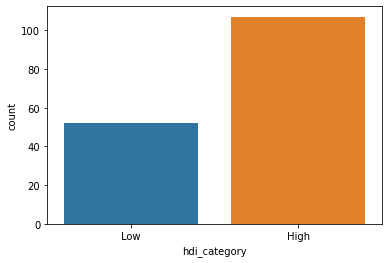

In [27]:
sns.countplot(df_stat.hdi_category) #plotting the different categories of hdi_category attribute using seaborn

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cdr_category', ylabel='count'>

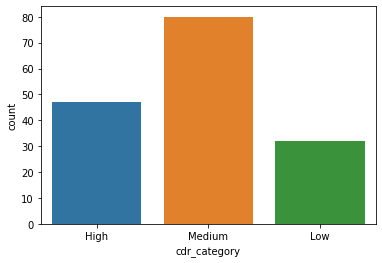

In [28]:
sns.countplot(df_stat.cdr_category) #plotting the different categories of cdr_category attribute using seaborn

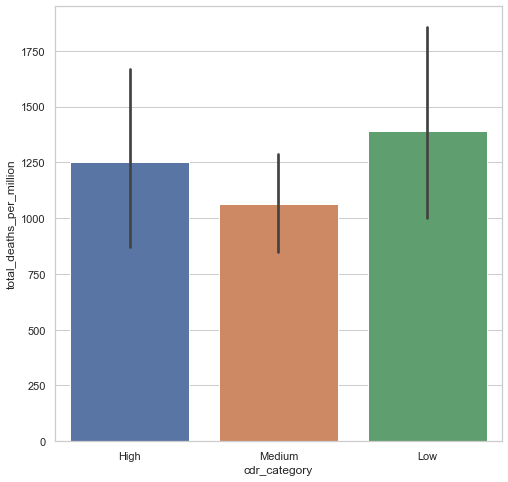

In [29]:
plt.figure(figsize=(8,8))
sns.set(style="whitegrid")
ax = sns.barplot(x="cdr_category", y="total_deaths_per_million",data=df_stat)
#using seaborn a barchart has been plotted taking cdr category on x axis and total deaths per million on y axis

*OBSERVATION MATRIX*

In [30]:
df_obs = df_stat.copy()
df_obs

,location,total_cases,total_deaths,total_deaths_per_million,cardiovasc_death_rate,diabetes_prevalence,gdp_per_capita,hospital_beds_per_thousand,human_development_index,cdr_category,country_status,hdi_category
724,Afghanistan,171673.0,7524.0,188.877,597.029,9.59,1803.987,0.50,0.511,High,Lower Income,Low
2216,Albania,269301.0,3430.0,1193.901,304.195,10.08,11803.431,2.89,0.795,High,Lower Income,High
2956,Algeria,263369.0,6772.0,151.782,278.364,6.73,13913.839,1.90,0.748,Medium,Lower Income,High
5837,Antigua and Barbuda,7395.0,135.0,1367.393,191.511,13.17,21490.943,3.80,0.778,Medium,Higher Income,High
6632,Argentina,8799858.0,124924.0,2739.212,191.032,5.50,18933.907,5.00,0.845,Medium,Lower Income,High
...,...,...,...,...,...,...,...,...,...,...,...,...
162130,Venezuela,508968.0,5572.0,194.113,204.850,6.47,16745.022,0.80,0.711,Medium,Lower Income,High
162903,Vietnam,2643024.0,39278.0,400.107,245.465,6.00,6171.884,2.60,0.704,Medium,Lower Income,High
164875,Yemen,11718.0,2114.0,69.333,495.003,5.35,1479.147,0.70,0.470,High,Lower Income,Low
165593,Zambia,310474.0,3941.0,208.291,234.499,3.94,3689.251,2.00,0.584,Medium,Lower Income,Low


In [31]:
cdr_low= df_obs[['total_deaths_per_million']] [df_obs['hdi_category'] == 'Low']

In [32]:
cdr_high= df_obs[['total_deaths_per_million']] [df_obs['hdi_category'] == 'High']

In [33]:
q1 = df_obs['total_deaths_per_million'].quantile(0.25)
q3 = df_obs['total_deaths_per_million'].quantile(0.75)
iqr=q3-q1
df_obs = df_obs[~((df_obs['total_deaths_per_million']<(q1-1.5*iqr))|(df_obs['total_deaths_per_million']>(q3+1.5-iqr)))]

In the observation matrix, the target is total deaths per million where as features are total_cases, total_deaths, 
cardiovascular_death_rate, diabetes_prevalence, gdp_per_capita, hospital_beds_per_thousand, humnan_development_index. 
A total of 159 samples each sample representing one country with various features and target has been taken.



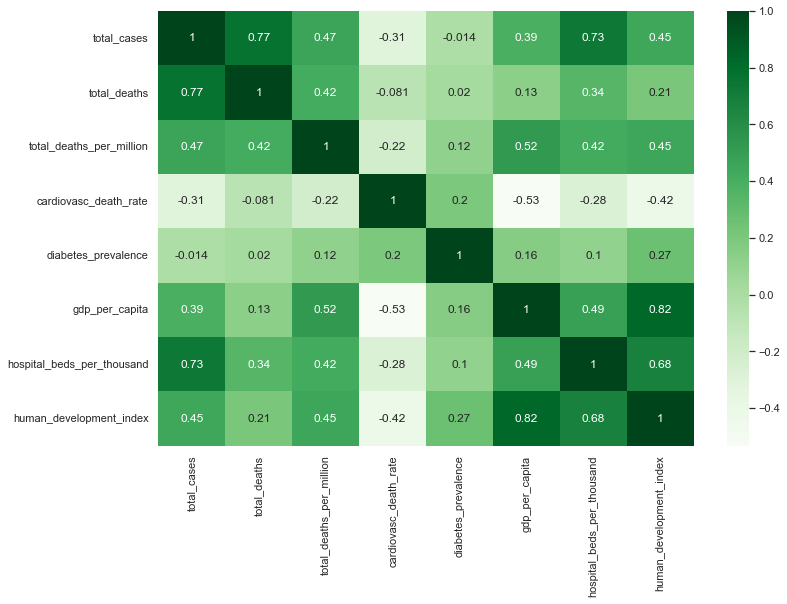

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df_obs.corr(),annot=True,cmap='Greens')
plt.show() #observation martrix/heat map.

*STATISTICAL TESTS*
1) MAN WHITNEY U TEST 

In [35]:
df_stat.hdi_category.unique()

array(['Low', 'High'], dtype=object)

Based on human development index categories Low and High, total deaths per million has been taken to perform the test. The hypothesis are 

The null hypothesis for inference 1 is 
H0: There is no difference in the mean value of “Total deaths per million” between high and low HDI (human development index) countries.

Whereas the alternate hypothesis is 

H1: There is a difference in the mean value of “Total deaths per million” between high and low HDI (human development index) countries.

In [36]:
lowhdi = df_stat[df_stat['hdi_category'] == 'Low']

In [37]:
highhdi = df_stat[df_stat['hdi_category'] == 'High']

In [38]:
stats.mannwhitneyu(x=lowhdi.total_deaths_per_million, y=highhdi.total_deaths_per_million, alternative = 'two-sided')

MannwhitneyuResult(statistic=525.0, pvalue=1.1849028719338944e-16)

When we tested inference 1 with the Mann-Whitney U test we got P value that is less than 0.05 which is less than the significance value 0.05
So we reject the null hypothesis for inference 1 that has been drawn using Mann Whitney U test. 


In [39]:
b = ['Low HDI Countries mean', 'High HDI countries mean']
a = pd.DataFrame([lowhdi.total_deaths_per_million.mean(),highhdi.total_deaths_per_million.mean()],index=b)
a

,0
Low HDI Countries mean,236.405077
High HDI countries mean,1645.476626


*KRUSKAL WALLIS TEST*
Kruskal Wallis test has been performed on total deaths per million using 3 categories of cardiovascular death rate that are low, medium and high. 

For this inference 2 the null hypothesis is
H0: There is no difference in the mean value of “Total deaths per million” between high, medium, and low CDR(Cardiovascular death rate) category countries.

And the alternate hypothesis is

H1: There is a difference in the mean value of “Total deaths per million” in between high, medium, and low CDR(Cardiovascular death rate) category countries.

In [40]:
df_stat.cdr_category.unique()

array(['High', 'Medium', 'Low'], dtype=object)

In [41]:
lowcdr = df_stat[df_stat['cdr_category'] == 'Low']['total_deaths_per_million']
medcdr = df_stat[df_stat['cdr_category'] == 'Medium']['total_deaths_per_million']
highcdr = df_stat[df_stat['cdr_category'] == 'High']['total_deaths_per_million']

In [42]:
stats.kruskal(lowcdr,medcdr,highcdr)

KruskalResult(statistic=2.4210604425933298, pvalue=0.2980392107911084)

When we tested inference 2 with the Kruskal-Wallis test, we got p value more than 0.05.
So, we fail to reject null hypothesis for inference 2.

In [43]:
gdp_per_cap = df_stat['gdp_per_capita']

*SPEARMAN R test* is used to find if there is any corelation between gdp_per_capita of a nation and total deaths per million
The hypothesis are
For inference 3, the null hypothesis is
H0: There is no association between “GDP per Capita” of the country and the COVID “Deaths per million” value.

the alternate hypothesis is
H1: There is an association between “GDP per Capita” of the country and the COVID “Deaths per million” value.

In [44]:
deaths_per_mill = df_stat['total_deaths_per_million']

In [45]:
stats.spearmanr(gdp_per_cap,deaths_per_mill)

SpearmanrResult(correlation=0.49751910675901606, pvalue=2.5302340522440056e-11)

When we tested inference 3 with the Spearman’s rho, we got correlation value of 0.49 and P value less than 0.05.
So, we rejected null hypothesis for inference 3.
There is a corelation between GDP per Capita and total deaths per million due to covid.


In [46]:
df_lin = df_stat.copy()

In [47]:
df_lin

,location,total_cases,total_deaths,total_deaths_per_million,cardiovasc_death_rate,diabetes_prevalence,gdp_per_capita,hospital_beds_per_thousand,human_development_index,cdr_category,country_status,hdi_category
724,Afghanistan,171673.0,7524.0,188.877,597.029,9.59,1803.987,0.50,0.511,High,Lower Income,Low
2216,Albania,269301.0,3430.0,1193.901,304.195,10.08,11803.431,2.89,0.795,High,Lower Income,High
2956,Algeria,263369.0,6772.0,151.782,278.364,6.73,13913.839,1.90,0.748,Medium,Lower Income,High
5837,Antigua and Barbuda,7395.0,135.0,1367.393,191.511,13.17,21490.943,3.80,0.778,Medium,Higher Income,High
6632,Argentina,8799858.0,124924.0,2739.212,191.032,5.50,18933.907,5.00,0.845,Medium,Lower Income,High
...,...,...,...,...,...,...,...,...,...,...,...,...
162130,Venezuela,508968.0,5572.0,194.113,204.850,6.47,16745.022,0.80,0.711,Medium,Lower Income,High
162903,Vietnam,2643024.0,39278.0,400.107,245.465,6.00,6171.884,2.60,0.704,Medium,Lower Income,High
164875,Yemen,11718.0,2114.0,69.333,495.003,5.35,1479.147,0.70,0.470,High,Lower Income,Low
165593,Zambia,310474.0,3941.0,208.291,234.499,3.94,3689.251,2.00,0.584,Medium,Lower Income,Low


In [48]:
df_lin.drop(['location','total_cases','total_deaths','diabetes_prevalence','hospital_beds_per_thousand','cdr_category','country_status','hdi_category'],inplace=True, axis=1)

In [49]:
df_lin

,total_deaths_per_million,cardiovasc_death_rate,gdp_per_capita,human_development_index
724,188.877,597.029,1803.987,0.511
2216,1193.901,304.195,11803.431,0.795
2956,151.782,278.364,13913.839,0.748
5837,1367.393,191.511,21490.943,0.778
6632,2739.212,191.032,18933.907,0.845
...,...,...,...,...
162130,194.113,204.850,16745.022,0.711
162903,400.107,245.465,6171.884,0.704
164875,69.333,495.003,1479.147,0.470
165593,208.291,234.499,3689.251,0.584


In [50]:
X = df_lin.iloc[:,[1,2,3]] #Independent variables
y = df_lin['total_deaths_per_million'] #Dependent variable

In [51]:
from sklearn import datasets, linear_model, metrics

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [54]:
reg = linear_model.LinearRegression()

In [55]:
reg.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred=reg.predict(X_test)

In [57]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2 score: ",r2_score(y_test,y_pred)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score:  46.2384188624287
RMSE:  886.8464751074544


We have performed linear regression model to predict the total deaths per million and error rate. The outcome/target variable is total deahs per million and the features are cardiovascular death rate, gdp per capita, human development index. The error rate has been calculated using mean squared error.  

In [58]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred.flatten()})
print(error_diff.head(5))

   Actual Values  Predicted Values
0       1603.769       1606.856097
1        188.586        109.221599
2        617.232       1543.552369
3        617.780        975.259832
4        808.864       1117.793508


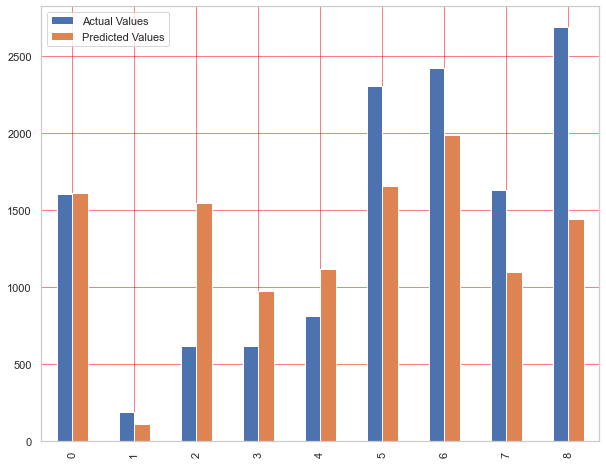

In [59]:
df1 = error_diff.head(9)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()